A)


One question that could be asked as a telecommunications service provider could be:

What correlation exists between churn, the Outage_sec_perweek, and MonthlyCharge?

| Name                  | Type     | Example                             |
|-----------------------|----------|-------------------------------------|
| CaseOrder             | int64    | 1                                   |
| Customer_id           | object   | K409198                             |
| Interaction           | object   | aa90260b-4141-4a24-8e36-b04ce1f4f77b|
| City                  | object   | Point Baker                         |
| State                 | object   | AK                                  |
| County                | object   | Prince of Wales-Hyder               |
| Zip                   | int64    | 99927                               |
| Lat                   | float64  | 56.25100                            |
| Lng                   | float64  | -133.37571                          |
| Population            | int64    | 38                                  |
| Area                  | object   | Urban                               |
| Timezone              | object   | America/Sitka                       |
| Job                   | object   | Environmental health practitioner   |
| Children              | float64  | 1.0                                 |
| Age                   | float64  | 68.0                                |
| Education             | object   | Master's Degree                     |
| Employment            | object   | Part Time                           |
| Income                | float64  | 28561.99                            |
| Marital               | object   | Widowed                             |
| Gender                | object   | Male                                |
| Churn                 | object   | No                                  |
| Outage_sec_perweek    | float64  | 6.972566                            |
| Email                 | int64    | 10                                  |
| Contacts              | int64    | 0                                   |
| Yearly_equip_failure  | int64    | 1                                   |
| Techie                | object   | No                                  |
| Contract              | object   | One year                            |
| Port_modem            | object   | Yes                                 |
| Tablet                | object   | Yes                                 |
| InternetService       | object   | Fiber Optic                         |
| Phone                 | object   | Yes                                 |
| Multiple              | object   | No                                  |
| OnlineSecurity        | object   | Yes                                 |
| OnlineBackup          | object   | Yes                                 |
| DeviceProtection      | object   | No                                  |
| TechSupport           | object   | No                                  |
| StreamingTV           | object   | No                                  |
| StreamingMovies       | object   | Yes                                 |
| PaperlessBilling      | object   | Yes                                 |
| PaymentMethod         | object   | Credit Card (automatic)             |
| Tenure                | float64  | 6.795513                            |
| MonthlyCharge         | float64  | 171.449762                          |
| Bandwidth_GB_Year     | float64  | 904.536110                          |
| item1                 | int64    | 5                                   |
| item2                 | int64    | 5                                   |
| item3                 | int64    | 5                                   |
| item4                 | int64    | 3                                   |
| item5                 | int64    | 4                                   |
| item6                 | int64    | 0                                   |
| item7                 | int64    | 3                                   |
| item8                 | int64    | 4                                   |


<span style="font-weight:300;font-size:16px">
  


# C)

### 1)


&emsp;&emsp;The first step I will use to assess the data quality is to identify missing values.
In python missing values can be detected with the df.isna().sum() function and its variations such as df.iloc[5].isna().sum()


&emsp;&emsp;The second step I will use to assess the data quality is to identify duplicates rows based on customer_id column. I will do this with the pandas library with the df.duplicated()function. Duplicate rows can also be identifed based on a subset of columns such as
df.duplicated(subset=['Customer_id']).


&emsp;&emsp;The third step I will use to assess the data quality is to identify outliers. I will identify outliers with frequency counts such as df['Your_Column_Name'].value_counts(), z-scores such as zscore(df[column_name]), or plot a histogram such as df['values'].hist() plt.show(). I will also plot histograms of categorical data value counts such as
plt.bar(category_counts.index, category_counts.values) with the matplotlib library.
  
  
  
### 2)
   
   
&emsp;&emsp;This is an effective approach to assess the quality of the data set because it addresses several quality metrics such as outliers, duplicates, and missingness. The python libraries and functions used are effective at working on large data sets. This approach also accounts for the characteristics of the data. Histograms, frequency counts, and the describe() function can be used on categorical data to identify outliers, while z-scores are preferred for numerical data.
 
 

### 3)


&emsp;&emsp;Python and the matplotlib, pandas, and scipy library are a good choice for data cleaning on this project. One reason is that I am familiar with python language. Another reason is that python and the associated libraries automate a lot of the statistical work. Stats.z-scores will normalize the data before taking the standard deviation and providing the z-score. Python and the related libraries also have related functions that can mitigate some of the data quality issues as well as identifying them.

</span>




In [1]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming your CSV file is named 'data.csv', adjust the file path as needed
file_path = '/home/dj/skewl/d206/churn_raw_data.csv'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [2]:
# drop index column
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# found lots of missing values here!

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [3]:
# Find duplicate rows 
duplicate_rows = df.duplicated(["Customer_id", "Interaction"]).sum()

# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)


0


In [4]:
#function to list outliers by Z-score

def get_outliers_z(col_name):
    df['zscore'] = stats.zscore(df['Population'])
    outliers = df.query('zscore > 3 | zscore < -3')
    print(outliers)
    del df[col_name]


In [5]:
#function to list outliers by interquartile range

def get_iqr_outliers(col_name):
    # calculate IQR for column Height
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df[(df[col_name] < Q1 - threshold * IQR) | (df[col_name] > Q3 + threshold * IQR)]
    print(f"outliers = len(outliers)")


In [9]:
#function to plot histogram
def plot_hist(col_name, num_bins, do_rotate=False):
    plt.hist(df[col_name], bins=num_bins)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col_name}')
    if do_rotate:
        plt.xticks(rotation=90)
    plt.show()


In [7]:
#function to print description of column
def print_desc(col_name):
    print(df[col_name].describe())

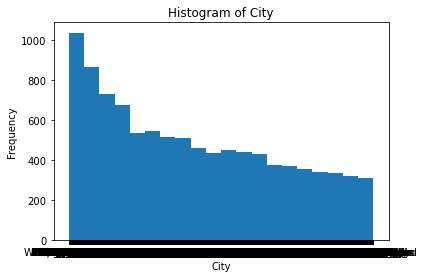

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object


In [30]:
#show histogram of city , no outliers
plot_hist("City",20)
print_desc("City")

In [13]:
#looks good
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object


In [14]:
#no issues here
print_desc("CaseOrder")

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: CaseOrder, dtype: float64


In [15]:
#no issues here
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object


In [16]:
#no issues here
print_desc("Interaction")

count                                    10000
unique                                   10000
top       aa90260b-4141-4a24-8e36-b04ce1f4f77b
freq                                         1
Name: Interaction, dtype: object


In [17]:
#no issues
print_desc("Customer_id")

count       10000
unique      10000
top       K409198
freq            1
Name: Customer_id, dtype: object


In [18]:
#no issues
print_desc("County")

count          10000
unique          1620
top       Washington
freq             111
Name: County, dtype: object


In [19]:
# there's a problem here because this should be an int. Note the min value!
print_desc("Zip")

count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
25%      26292.500000
50%      48869.500000
75%      71866.500000
max      99929.000000
Name: Zip, dtype: float64


In [20]:
#looks good
print_desc("Lat")

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64


In [21]:
#looks good
print_desc("Lng")

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64


count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


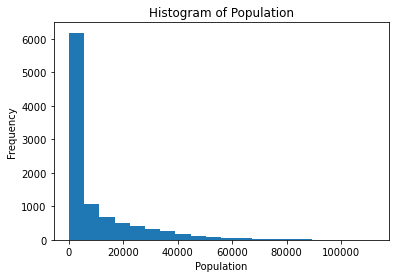

In [22]:

#this could be bad data. There is 6000 places with 0 population according to census.

print_desc("Population")
plot_hist("Population",20)

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object


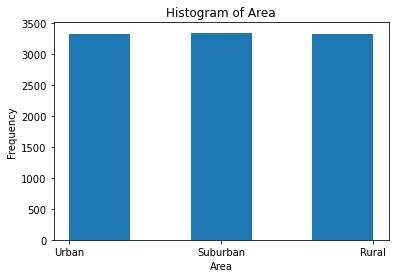

In [23]:
#looks good. Equal distribution.
print_desc("Area")
plot_hist("Area",5)

In [24]:
# something wrong. There should only be 24 timezones!
print_desc("Timezone")
df["Timezone"].value_counts()

count                10000
unique                  25
top       America/New_York
freq                  4072
Name: Timezone, dtype: object


America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: Timezone, dtype: in

In [25]:
#looks good
print_desc("Job")

count                         10000
unique                          639
top       Occupational psychologist
freq                             30
Name: Job, dtype: object


count    10000.000000
mean         1.573000
std          2.075356
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64


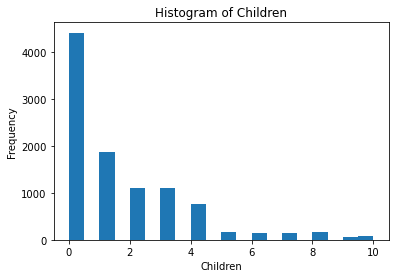

In [26]:
#values look ok after adjusting missing values with 0
df['Children'] = df['Children'].fillna(0)
print_desc("Children")
plot_hist("Children",20)

count    10000.000000
mean        53.275748
std         18.003063
min         18.000000
25%         41.000000
50%         53.275748
75%         65.000000
max         89.000000
Name: Age, dtype: float64


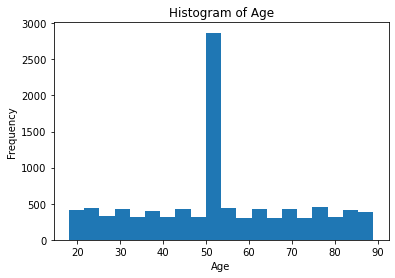

In [27]:
#values look same after adjusting missing values with mean value. A lot of people around 50.
df['Age'] = df['Age'].fillna(df['Age'].mean())
print_desc("Age")
plot_hist("Age",20)

count                           10000
unique                             12
top       Regular High School Diploma
freq                             2421
Name: Education, dtype: object


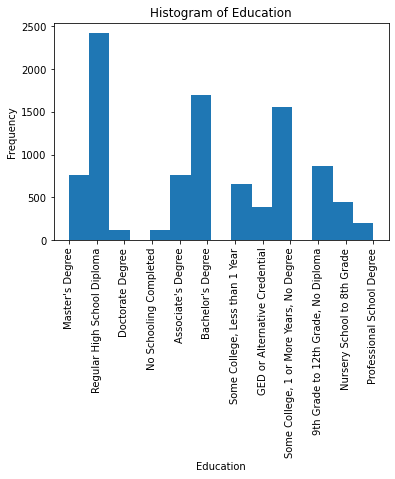

In [28]:
print_desc("Education")
plot_hist("Education",15,True)

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object


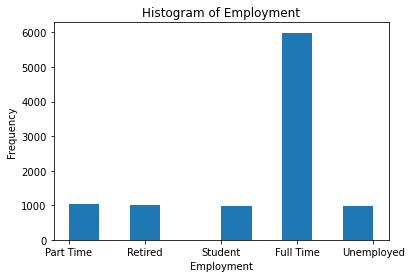

In [38]:
print_desc("Employment")
plot_hist("Employment",10)

# Clean UP STEPS

In [ ]:
#replace missing values in children with 0
#df['Children'] = df['Children'].fillna(0)


In [ ]:
# change data type to int because children are whole numbers
#df['Children'] = df['Children'].astype(int)


In [ ]:
#replace missing values and convert to int
#df['Age'] = df['Age'].fillna(0)
#df['Age'] = df['Age'].astype(int)

In [ ]:
#replace missing values
#df['Income'] = df['Income'].fillna(0)


In [ ]:
#replace missing values
#df['Techie'] = df['Techie'].fillna("No")

In [ ]:
#df['Phone'] = df['Phone'].fillna("No")